## MLSA Project 
### Name: Manish Raut
### Reg. No.: 24-27-21
### Course: Mtech(Data Science)

In [48]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [49]:
glass = fetch_ucirepo(id=42)
X = glass.data.features
y = glass.data.targets.values.ravel() 

In [50]:
metadata = glass.metadata
variables = glass.variables

print("Dataset Metadata:\n", metadata)
print("Variables Info:\n", variables)

Dataset Metadata:
 {'uci_id': 42, 'name': 'Glass Identification', 'repository_url': 'https://archive.ics.uci.edu/dataset/42/glass+identification', 'data_url': 'https://archive.ics.uci.edu/static/public/42/data.csv', 'abstract': 'From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc)', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 214, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Type_of_glass'], 'index_col': ['Id_number'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1987, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5WW2P', 'creators': ['B. German'], 'intro_paper': None, 'additional_info': {'summary': 'Vina conducted a comparison test of her rule-based system, BEAGLE, the nearest-neighbor algorithm, and discriminant analysis.  BEAGLE is a product available through

In [51]:
print("\n--- Summary Statistics ---\n")
print(X.describe())


--- Summary Statistics ---

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe  
count  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009  
std      1.423153    0.497219    0.097439  
min      5.430000    0.000000    0.000000  
25%      8.240000    

In [52]:
print("\n--- Missing Values ---\n")
print(X.isnull().sum())


--- Missing Values ---

RI    0
Na    0
Mg    0
Al    0
Si    0
K     0
Ca    0
Ba    0
Fe    0
dtype: int64


<Figure size 1000x600 with 0 Axes>

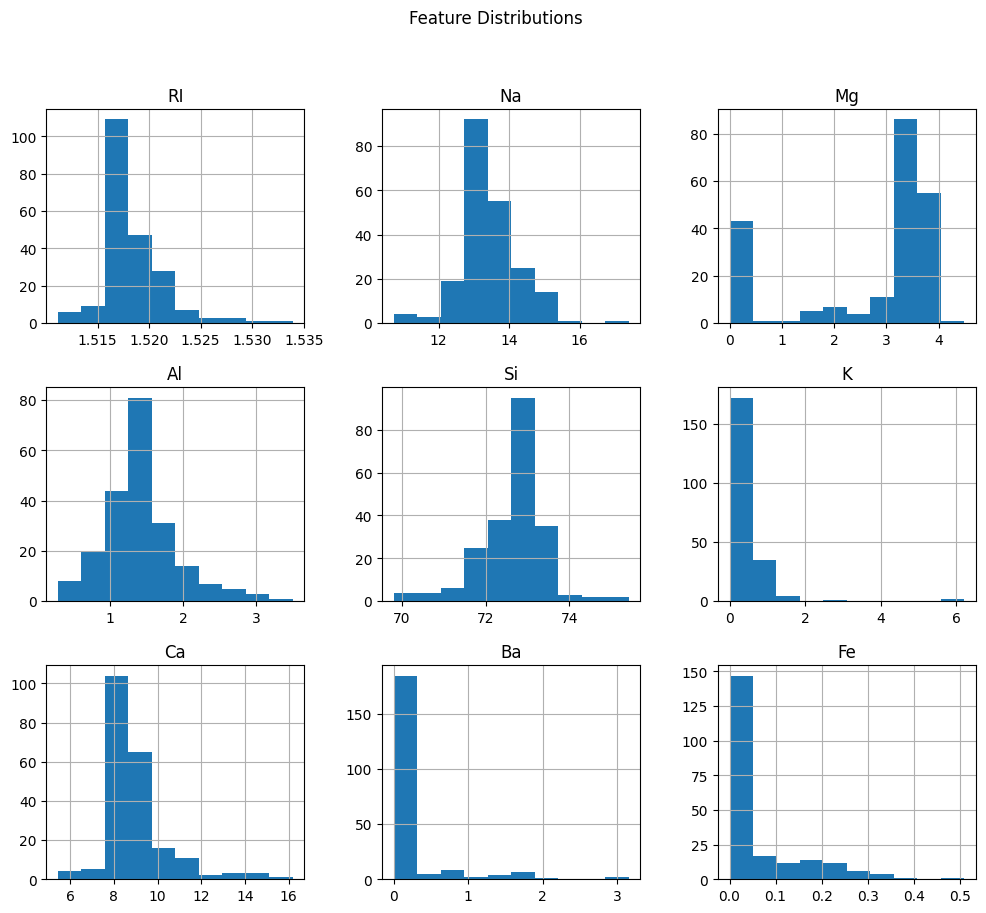

In [53]:
plt.figure(figsize=(10, 6))
X.hist(figsize=(12, 10))
plt.suptitle('Feature Distributions')
plt.show()

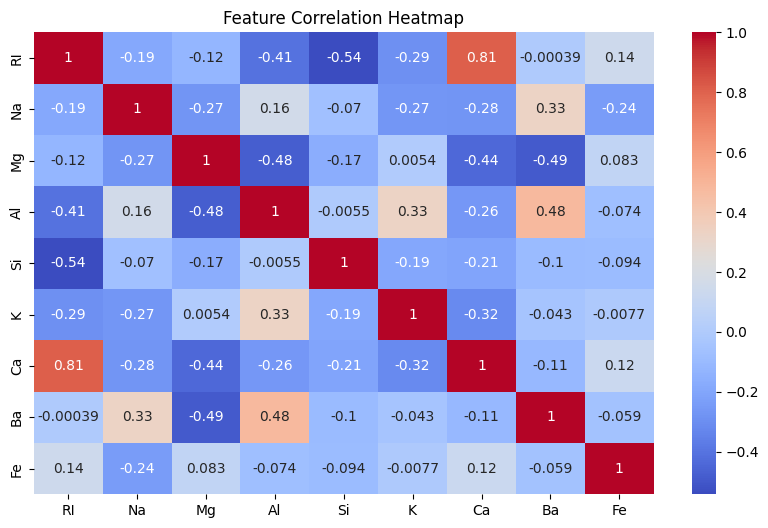

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

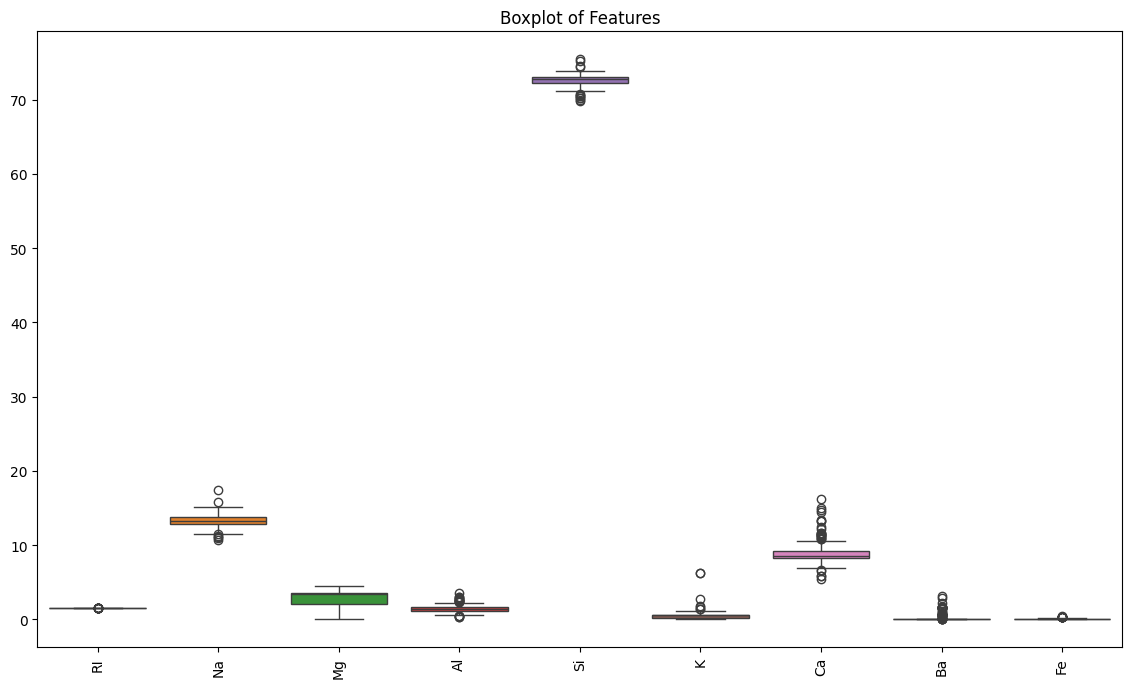

In [55]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

In [56]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

In [59]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

def plot_multiclass_roc(model, X_test, y_test, title="ROC Curve"):
    y_score = model.predict_proba(X_test)
    y_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()



========== Decision Tree ==========
              precision    recall  f1-score   support

           1       0.55      0.43      0.48        14
           2       0.69      0.60      0.64        15
           3       0.20      0.33      0.25         3
           5       0.75      1.00      0.86         3
           6       0.50      0.50      0.50         2
           7       0.62      0.83      0.71         6

    accuracy                           0.58        43
   macro avg       0.55      0.62      0.57        43
weighted avg       0.60      0.58      0.58        43

Accuracy: 0.5813953488372093


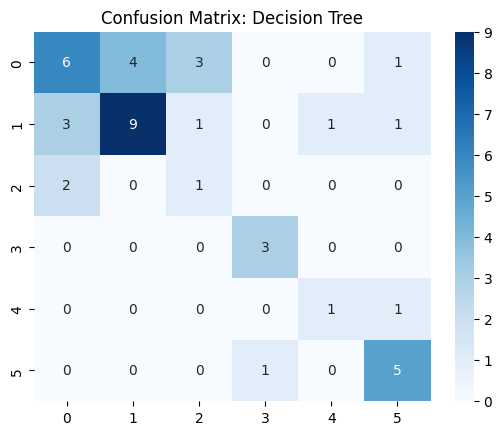

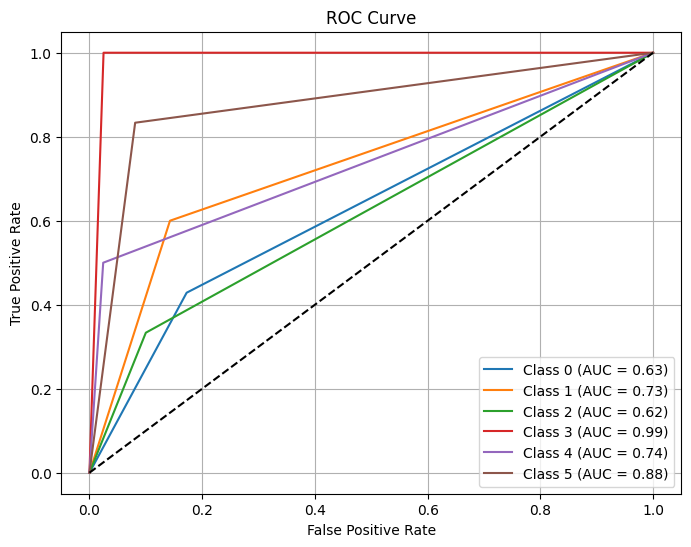

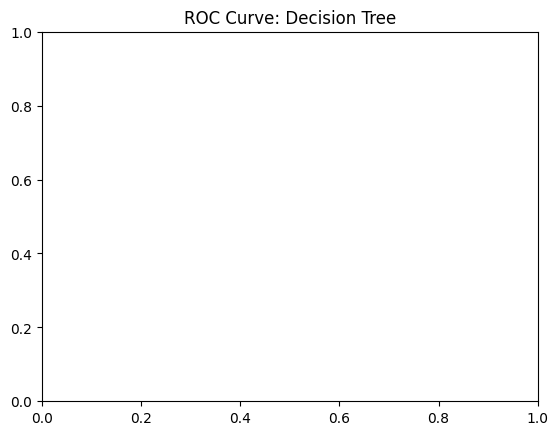

In [60]:
# Decision Tree
print("\n" + "="*10 + " Decision Tree " + "="*10)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", dt.score(X_test, y_test))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Blues')
plt.title("Confusion Matrix: Decision Tree")
plt.show()

if hasattr(dt, "predict_proba"):
    plot_multiclass_roc(dt, X_test, y_test)
    plt.title("ROC Curve: Decision Tree")
    plt.show()


========== Random Forest ==========
              precision    recall  f1-score   support

           1       0.64      0.64      0.64        14
           2       0.77      0.67      0.71        15
           3       0.33      0.33      0.33         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.75      1.00      0.86         6

    accuracy                           0.70        43
   macro avg       0.67      0.69      0.67        43
weighted avg       0.70      0.70      0.69        43

Accuracy: 0.6976744186046512


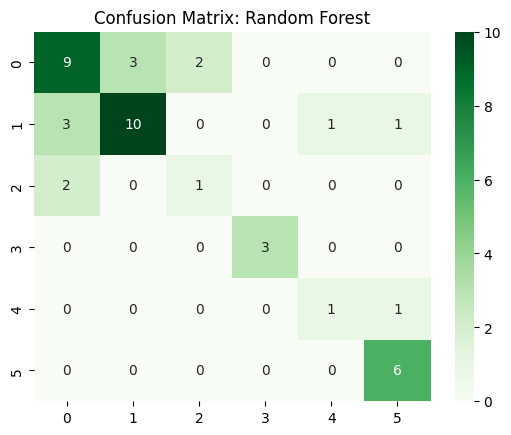

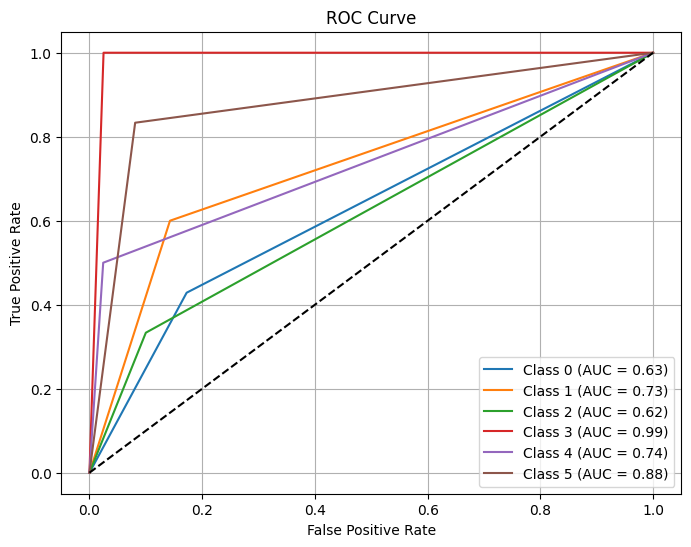

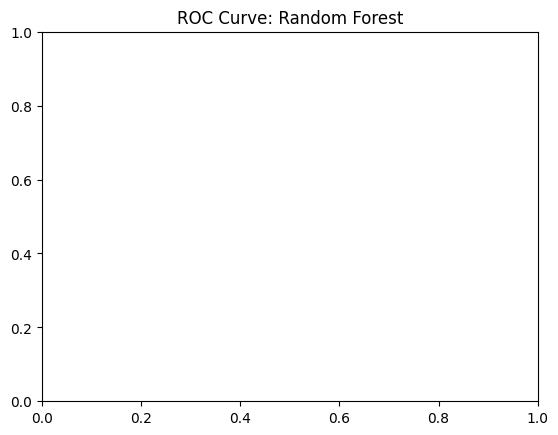

In [61]:
# Random Forest
print("\n" + "="*10 + " Random Forest " + "="*10)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", rf.score(X_test, y_test))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Greens')
plt.title("Confusion Matrix: Random Forest")
plt.show()

if hasattr(dt, "predict_proba"):
    plot_multiclass_roc(dt, X_test, y_test)
    plt.title("ROC Curve: Random Forest")
    plt.show()


========== SVM ==========
              precision    recall  f1-score   support

           1       0.69      0.79      0.73        14
           2       0.65      0.73      0.69        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.50      0.50      0.50         2
           7       0.83      0.83      0.83         6

    accuracy                           0.70        43
   macro avg       0.61      0.59      0.59        43
weighted avg       0.66      0.70      0.67        43

Accuracy: 0.6976744186046512


c:\Users\msrau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\msrau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\msrau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

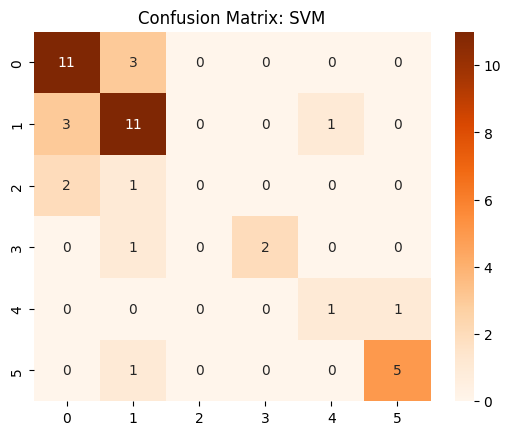

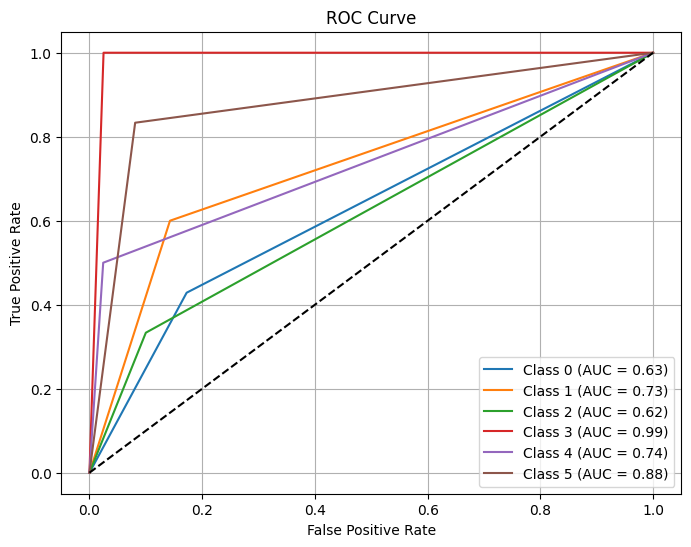

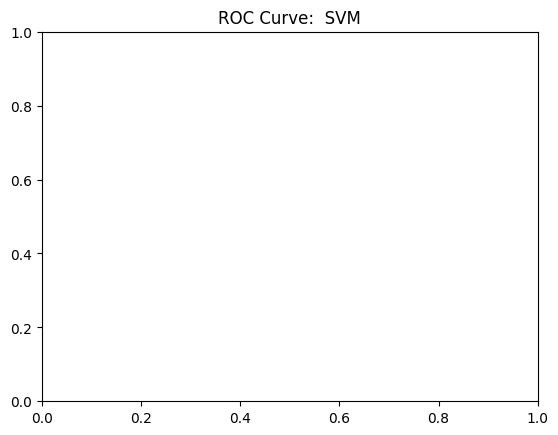

In [62]:
# SVM
print("\n" + "="*10 + " SVM " + "="*10)
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", svm.score(X_test, y_test))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Oranges')
plt.title("Confusion Matrix: SVM")
plt.show()

if hasattr(dt, "predict_proba"):
    plot_multiclass_roc(dt, X_test, y_test)
    plt.title("ROC Curve:  SVM")
    plt.show()


========== KNN ==========
              precision    recall  f1-score   support

           1       0.79      0.79      0.79        14
           2       0.72      0.87      0.79        15
           3       0.00      0.00      0.00         3
           5       0.67      0.67      0.67         3
           6       0.50      0.50      0.50         2
           7       0.83      0.83      0.83         6

    accuracy                           0.74        43
   macro avg       0.58      0.61      0.60        43
weighted avg       0.69      0.74      0.72        43

Accuracy: 0.7441860465116279


c:\Users\msrau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\msrau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\msrau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

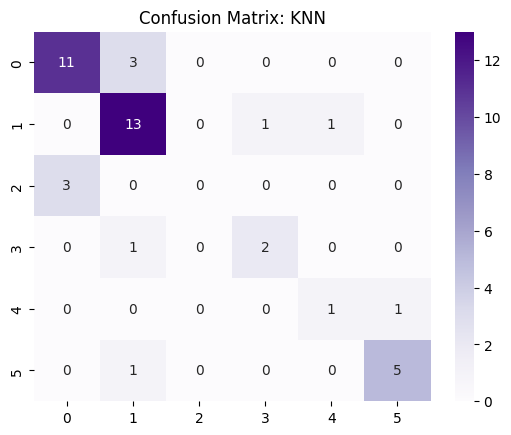

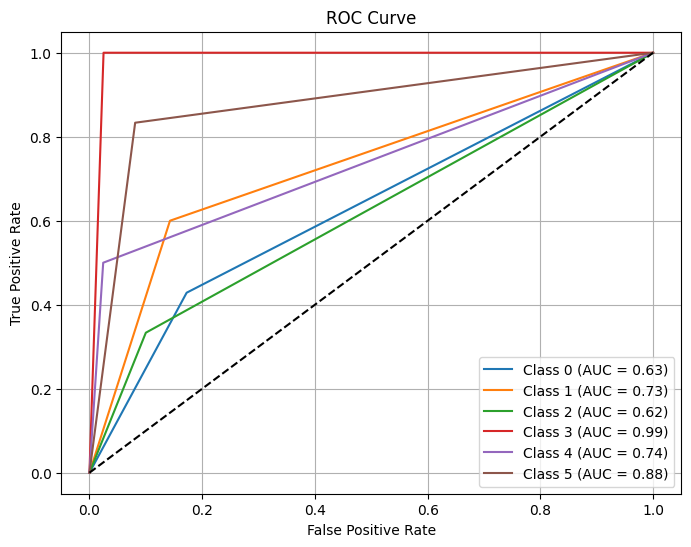

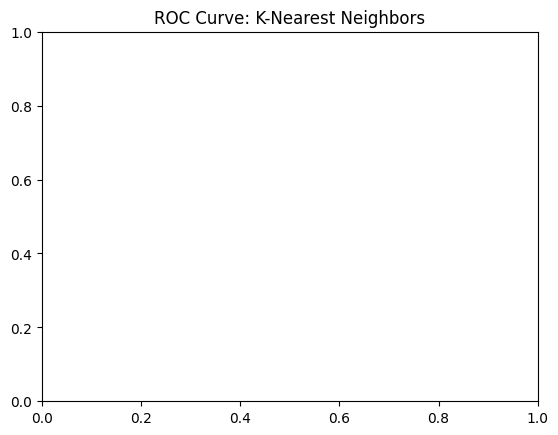

In [63]:
# K-Nearest Neighbors
print("\n" + "="*10 + " KNN " + "="*10)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", knn.score(X_test, y_test))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap='Purples')
plt.title("Confusion Matrix: KNN")
plt.show()

if hasattr(dt, "predict_proba"):
    plot_multiclass_roc(dt, X_test, y_test)
    plt.title("ROC Curve: K-Nearest Neighbors")
    plt.show()


========== Neural Network (MLP) ==========


c:\Users\msrau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.64      0.50      0.56        14
           2       0.69      0.73      0.71        15
           3       0.25      0.33      0.29         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       0.83      0.83      0.83         6

    accuracy                           0.67        43
   macro avg       0.68      0.73      0.70        43
weighted avg       0.68      0.67      0.67        43

Accuracy: 0.6744186046511628


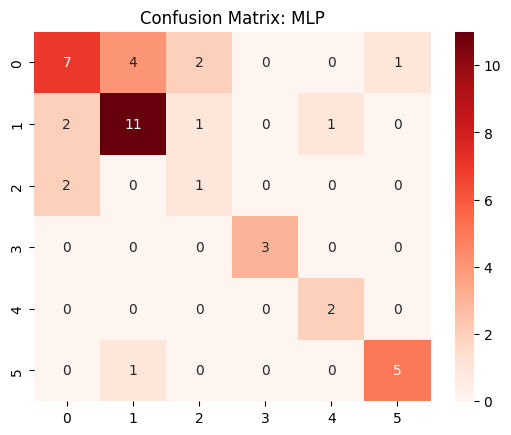

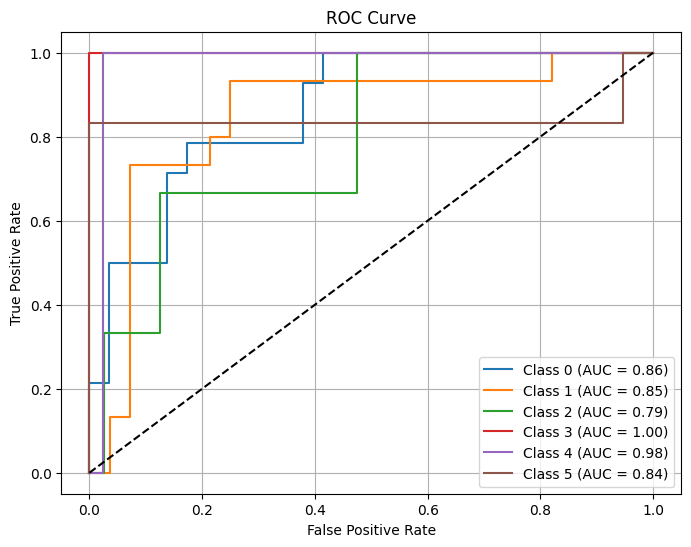

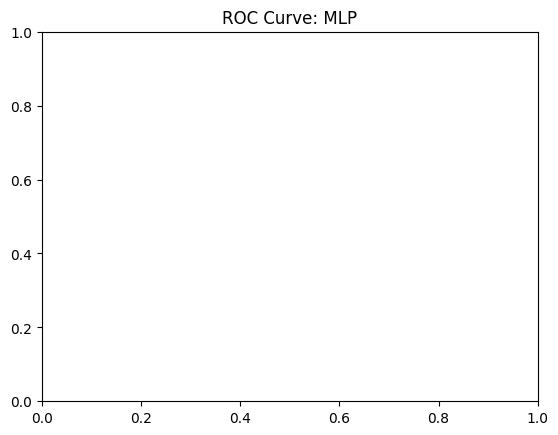

In [64]:
# Neural Network (MLP)
print("\n" + "="*10 + " Neural Network (MLP) " + "="*10)
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
print(classification_report(y_test, y_pred_mlp))
print("Accuracy:", mlp.score(X_test, y_test))
sns.heatmap(confusion_matrix(y_test, y_pred_mlp), annot=True, cmap='Reds')
plt.title("Confusion Matrix: MLP")
plt.show()
if hasattr(mlp, "predict_proba"):
    plot_multiclass_roc(mlp, X_test, y_test)
    plt.title("ROC Curve: MLP")
    plt.show()


====== Accuracy Comparison ======

                      Accuracy
KNN                   0.744186
SVM                   0.697674
Random Forest         0.697674
Neural Network (MLP)  0.674419
Decision Tree         0.581395


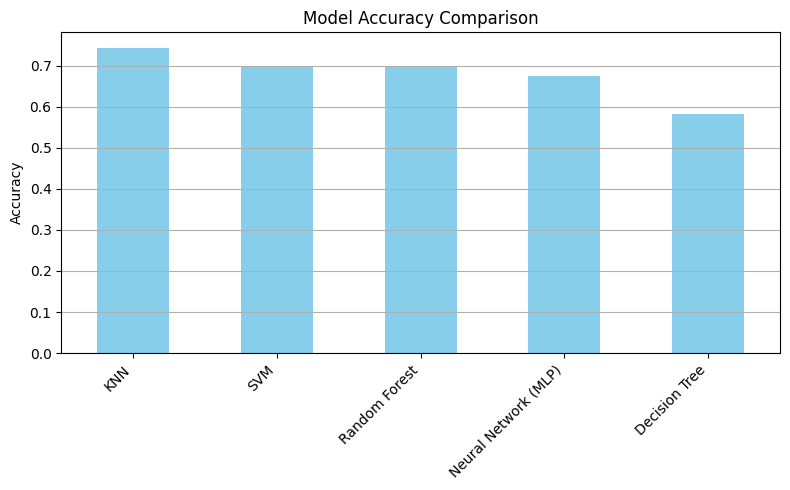

In [65]:
model_accuracies = {
    "Decision Tree": dt.score(X_test, y_test),
    "Random Forest": rf.score(X_test, y_test),
    "SVM": svm.score(X_test, y_test),
    "KNN": knn.score(X_test, y_test),
    "Neural Network (MLP)": mlp.score(X_test, y_test)
}


accuracy_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=["Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

print("\n====== Accuracy Comparison ======\n")
print(accuracy_df)

accuracy_df.plot(kind="bar", legend=False, figsize=(8, 5), color="skyblue")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
